En este cuadernillo se busca principalmente evaluar la calidad de los datos tomados para la interventoria 2024-I


In [10]:
import pandas as pd 
import plotly.express as px
import seaborn as sns


In [22]:
df = pd.read_csv('Resultados_PAE.csv')
df_BO = pd.read_csv('Reporte BO.csv')
df_IE = pd.read_csv('Reporte IE.csv')
df

,Código,N° Visita,N° Visita Total,Fecha Planeada Inicio,Fecha Actualización,Municipio,Nombre IED,Nombre Sede,Item,Instrumento,Pregunta,Respuesta,Observación,Actualizado Por,Estado,Obligación Contractual
0,OR-A-0610,1.0,NaN,10/06/23,10/08/23,NaN,NaN,PARQUE INDUSTRIAL CALAVERIA KM.7,10,Organoléptico - Deprec,Identifique la causal del caso de atención pri...,No se presentaron CAP,NaN,ANACHELLISB,Instrumento cargado,NaN
1,OR-024-0810,3.0,NaN,10/08/23,09/09/23,JUAN DE ACOSTA,INSTITUCION EDUCATIVA FERMIN TILANO,INSTITUCION EDUCATIVA FERMIN TILANO,10,Organoléptico - Deprec,Identifique la causal del caso de atención pri...,No se presentaron CAP,Al llegar a la Institución educativa 8:00 am y...,RAMIREZLOPEZWILVER,Instrumento cargado,NaN
2,OR-032-0810,1.0,NaN,10/08/23,28/09/23,LURUACO,INSTITUCION EDUCATIVA TECNICA AGROPECUARIA NUE...,I.E.B. N 11 SOCAVON,10,Organoléptico - RI,Identifique la causal del caso de atención pri...,No se presentaron CAP,NaN,RAMIREZLOPEZWILVER,Instrumento cargado,NaN
3,OR-046-0810,2.0,NaN,10/08/23,31/08/23,PONEDERA,INSTITUCION EDUCATIVA TECNICA AGROPECUARIA LA ...,GABRIEL GARCIA MARQUEZ,10,Organoléptico - Deprec,Identifique la causal del caso de atención pri...,No se presentaron CAP,NaN,RAMIREZLOPEZWILVER,Instrumento cargado,NaN
4,OR-049-0620,2.0,NaN,20/06/23,17/07/23,PONEDERA,INSTITUCION EDUCATIVA TECNICA AGROPECUARIA DE ...,I.E. TECNICA AGROPECUARIA DE PUERTO GIRALDO - ...,10,Organoléptico - Deprec,Identifique la causal del caso de atención pri...,No se presentaron CAP,NaN,KSOSA,Instrumento cargado,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110781,IE-169-240607,1.0,1.0,07/06/24,11/06/24,Suan,I.E. ADOLFO LEÓN BOLIVAR MARENCO DE SUAN,ANTONIO NARIÑO,710,Institución - RI,"Estación de desinfección de manos y pies, para...",No observado/No aplica,No aplica,SMILENA,Diligenciado,NaN
110782,IE-169-240607,1.0,1.0,07/06/24,11/06/24,Suan,I.E. ADOLFO LEÓN BOLIVAR MARENCO DE SUAN,ANTONIO NARIÑO,720,Institución - RI,Se realiza control de temperatura previo al in...,No observado/No aplica,No aplica,SMILENA,Diligenciado,NaN
110783,IE-169-240607,1.0,1.0,07/06/24,11/06/24,Suan,I.E. ADOLFO LEÓN BOLIVAR MARENCO DE SUAN,ANTONIO NARIÑO,730,Institución - RI,En la IE se promueve el buen uso y manejo del ...,No observado/No aplica,No aplica,SMILENA,Diligenciado,NaN
110784,IE-169-240607,1.0,1.0,07/06/24,11/06/24,Suan,I.E. ADOLFO LEÓN BOLIVAR MARENCO DE SUAN,ANTONIO NARIÑO,740,Institución - RI,El operador facilita el suministro de informac...,Cumple,NaN,SMILENA,Diligenciado,NaN


In [23]:
df_BO

,Código,Instrumento,Municipio,Institución,Auditor,Dirección,N° Visita,Fecha Planeada Inicio,Promedio Total,1 P,...,Promedio Categoría A,Promedio Categoría B,Promedio Categoría C,Promedio Categoría D Limpieza y Desinfección,Promedio Categoría E,Promedio Categoría F Abastecimiento Agua,Promedio Categoría G,Promedio Categoría H,Promedio Categoría I,Promedio Categoría J
0,BO-A-0413,Bodega RI,BARRANQUILLA,PARQUE INDUSTRIAL CALAVERIA KM.7,ANA CHELLIS BONFANTE ACUÑA,PARQUE INDUSTRIAL CALAVERIA KM.7,1,13/04/23,0.75,3,...,1.00,1,0.94,0.67,0.5,1,0,0.59,1.00,1.00
1,BO-A-0415,Bodega RI,BARRANQUILLA,PARQUE INDUSTRIAL CALAVERIA KM.7,ANA CHELLIS BONFANTE ACUÑA,PARQUE INDUSTRIAL CALAVERIA KM.7,2,15/04/23,0.85,0,...,0.63,1,1.00,0.67,1.0,1,1,0.78,1.00,0.78
2,BO-A-0421,Bodega RI,BARRANQUILLA,PARQUE INDUSTRIAL CALAVERIA KM.7,ANA CHELLIS BONFANTE ACUÑA,PARQUE INDUSTRIAL CALAVERIA KM.7,3,21/04/23,0.81,0,...,0.63,1,1.00,0.67,1.0,1,1,0.69,1.00,0.78
3,BO-A-0429,Bodega RI,BARRANQUILLA,PARQUE INDUSTRIAL CALAVERIA KM.7,ANA CHELLIS BONFANTE ACUÑA,PARQUE INDUSTRIAL CALAVERIA KM.7,4,29/04/23,0.83,0,...,0.63,1,1.00,0.67,1.0,1,1,0.73,1.00,0.78
4,BO-A-0509,Bodega RI,BARRANQUILLA,PARQUE INDUSTRIAL CALAVERIA KM.7,ANA CHELLIS BONFANTE ACUÑA,PARQUE INDUSTRIAL CALAVERIA KM.7,5,09/05/23,0.87,3,...,1.00,1,1.00,0.67,1.0,1,1,0.78,1.00,0.78
5,BO-A-0520,Bodega RI,BARRANQUILLA,PARQUE INDUSTRIAL CALAVERIA KM.7,ANA CHELLIS BONFANTE ACUÑA,PARQUE INDUSTRIAL CALAVERIA KM.7,6,20/05/23,0.88,3,...,1.00,1,1.00,0.67,1.0,1,1,0.80,1.00,0.78
6,BO-A-0525,Bodega RI,BARRANQUILLA,PARQUE INDUSTRIAL CALAVERIA KM.7,ANA CHELLIS BONFANTE ACUÑA,PARQUE INDUSTRIAL CALAVERIA KM.7,7,25/05/23,0.92,NO,...,1.00,1,1.00,0.67,1.0,1,1,0.87,1.00,1.00
7,BO-A-0530,Bodega RI,BARRANQUILLA,PARQUE INDUSTRIAL CALAVERIA KM.7,ANA CHELLIS BONFANTE ACUÑA,PARQUE INDUSTRIAL CALAVERIA KM.7,8,30/05/23,0.86,0,...,0.25,1,1.00,0.67,1.0,1,1,0.88,0.75,1.00
8,BO-A-0610,Bodega RI,BARRANQUILLA,PARQUE INDUSTRIAL CALAVERIA KM.7,ANA CHELLIS BONFANTE ACUÑA,PARQUE INDUSTRIAL CALAVERIA KM.7,9,10/06/23,0.91,0,...,0.63,1,1.00,0.67,1.0,1,1,0.88,1.00,1.00
9,BO-A-0621,Bodega RI,BARRANQUILLA,PARQUE INDUSTRIAL CALAVERIA KM.7,ANA CHELLIS BONFANTE ACUÑA,PARQUE INDUSTRIAL CALAVERIA KM.7,10,21/06/23,0.90,3,...,1.00,1,1.00,0.50,0.5,1,1,0.86,1.00,1.00


In [25]:
df_IE

,Código,Instrumento,Municipio,Institución,Auditor,Dirección,N° Visita,Fecha Planeada Inicio,Promedio Total,1 P,...,69 P,70 P,Promedio Categoría L,71 P,72 P,73 P,Promedio Categoría M,74 P,Promedio Categoría N,Id_Institucion
0,IE-001-0503,Institución - RI,BARANOA,INSTITUCION EDUCATIVA ESCUELA NORMAL SUPERIOR ...,SANDRA MILENA SILVERA PABUENA,NaN,1,03/05/23,0.86,3,...,2,1,1.0,NO,NO,NO,NaN,1,1.0,001-INSTITUCION EDUCATIVA ESCUELA NORMAL SUPER...
1,IE-001-0511,Institución - RI,BARANOA,INSTITUCION EDUCATIVA ESCUELA NORMAL SUPERIOR ...,LAURA AYALA IGLESIAS,NaN,2,11/05/23,0.61,0,...,2,0,0.8,NO,NO,NO,NaN,1,1.0,001-INSTITUCION EDUCATIVA ESCUELA NORMAL SUPER...
2,IE-001-0525,Institución - RI,BARANOA,INSTITUCION EDUCATIVA ESCUELA NORMAL SUPERIOR ...,ELVIRA BEATRIZ ALGARIN RODRIGUEZ,NaN,3,25/05/23,0.69,3,...,2,1,1.0,NO,NO,NO,NaN,1,1.0,001-INSTITUCION EDUCATIVA ESCUELA NORMAL SUPER...
3,IE-001-0608,Institución - RI,BARANOA,INSTITUCION EDUCATIVA ESCUELA NORMAL SUPERIOR ...,LAURA AYALA IGLESIAS,NaN,4,08/06/23,0.79,3,...,2,1,1.0,NO,NO,NO,NaN,1,1.0,001-INSTITUCION EDUCATIVA ESCUELA NORMAL SUPER...
4,IE-001-0718,Institución - RI,BARANOA,INSTITUCION EDUCATIVA ESCUELA NORMAL SUPERIOR ...,NERYETH SARMIENTO CORRO,NaN,5,18/07/23,0.65,0,...,2,1,1.0,NO,NO,NO,NaN,1,1.0,001-INSTITUCION EDUCATIVA ESCUELA NORMAL SUPER...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1434,IE-165-240607,Institución - PS,SANTO TOMAS,INSTITUCION EDUCATIVA TECNICA COMERCIAL DE SA...,Johana Milena Millan Avila,NaN,1,07-Jun-24,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,165-INSTITUCION EDUCATIVA TECNICA COMERCIAL D...
1435,IE-168-240604,Institución - RI,SUAN,ALIANZA PARA EL PROGRESO,Sandra Milena Silvera pabuena,NaN,1,04-Jun-24,0.82,4,...,2,NO,1.0,NO,NO,NO,NaN,1,1.0,168-ALIANZA PARA EL PROGRESO
1436,IE-169-240607,Institución - RI,SUAN,ANTONIO NARIÑO,Sandra Milena Silvera pabuena,NaN,1,07-Jun-24,0.79,4,...,2,1,1.0,NO,NO,NO,NaN,1,1.0,169-ANTONIO NARIÑO
1437,IE-177-240606,Institución - RI,TUBARA,EL MORRO TUBARA,Johana Milena Millan Avila,NaN,1,06-Jun-24,NaN,NO,...,NO,NO,NaN,NO,NO,NO,NaN,NO,NaN,177-EL MORRO TUBARA


In [12]:
null_percent = df.isnull().mean() * 100
print(null_percent)


Código                     0.000000
N° Visita                  1.975881
N° Visita Total            2.919141
Fecha Planeada Inicio      0.000000
Fecha Actualización        0.000000
Municipio                  3.036485
Nombre IED                 3.036485
Nombre Sede                0.000000
Item                       0.000000
Instrumento                0.000000
Pregunta                   0.000000
Respuesta                 10.286498
Observación               67.926453
Actualizado Por            0.000000
Estado                     0.000000
Obligación Contractual    93.006337
dtype: float64


/tmp/ipykernel_420277/1429357934.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


<Axes: >

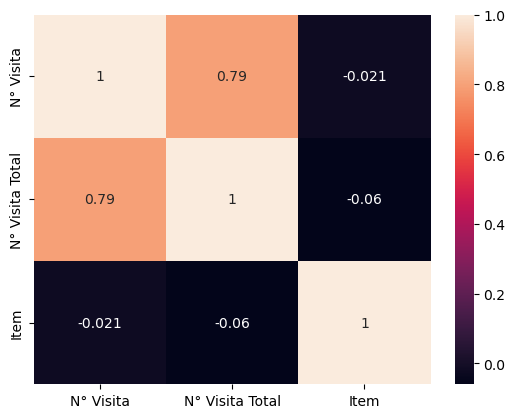

In [13]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)


In [16]:
df['Municipio'] = df['Municipio'].str.lower().str.strip()  # Ejemplo para limpiar texto


In [19]:
px.box(data,y='Item')